In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings

from pandas.core.frame import DataFrame
from glassnode import *
from tqdm import tqdm
from utilities import ohlc_plot

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)


In [2]:
GLASSNODE_API_KEY = '1vUcyF35hTk9awbNGszF0KcLuYH'

self = GlassnodeClient()
self.set_api_key(GLASSNODE_API_KEY)


Metrics = {'Indicators':Indicators,
           'Market':Market,
           'Mining':Mining,
           'Supply':Supply,
           'Addresses':Addresses,
           'Transactions':Transactions,
           'Blockchain':Blockchain,
           'Derivatives':Derivatives,
           'Distribution':Distribution,
           'Entities':Entities,
           'Institutions':Institutions}


DataDict = {}
series = {}
dataframes = {}
catalog = {}

for group in Metrics:
    DataDict[group] = {}
    series[group] = []
    dataframes[group] = []
    catalog[group] = []

In [3]:
for group in tqdm(list(Metrics.keys())):
    
    metric = Metrics[group]

    for m in metric:
        df = pd.DataFrame()
        
        url = URLS[group] + m
        a ='BTC'
        c = 'native'
        i='24h'

        df = self.get(url,a,i,c)
        
        if isinstance(df,pd.DataFrame):
            dataframes[group].append(m)
        else:
            series[group].append(m)
            
        DataDict[group][m] = df
        
        try:
            start_date = df.index[0].strftime('%Y-%m-%d')
            end_date = df.index[-1].strftime('%Y-%m-%d')
            
            if isinstance(df,pd.DataFrame):
                N_NaNs = df.iloc[:,0].isna().sum()
            else:
                N_NaNs = df.isna().sum()
                
        except:
            start_date,end_date,N_NaNs
            
        catalog[group].append({'Name':m,'start_date':start_date,'end_date':end_date,'N_NaNs':N_NaNs})
        
    catalog[group] = pd.DataFrame(catalog[group])

  0%|                                                    | 0/11 [00:00<?, ?it/s]

'DataFrame' object has no attribute 'v'
'DataFrame' object has no attribute 'v'
404 Client Error: Not Found for url: https://api.glassnode.com/v1/metrics/indicators/unrealized_profit_account_basedunrealized_loss_account_based?a=BTC&i=24h&c=native&api_key=1vUcyF35hTk9awbNGszF0KcLuYH
404 page not found

Extra data: line 1 column 5 (char 4)
'DataFrame' object has no attribute 'v'
'DataFrame' object has no attribute 'v'


 36%|████████████████                            | 4/11 [04:36<07:13, 61.94s/it]

400 Client Error: Bad Request for url: https://api.glassnode.com/v1/metrics/addresses/min_32_count?a=BTC&i=24h&c=native&api_key=1vUcyF35hTk9awbNGszF0KcLuYH
asset is not supported. Only ETH is supported

Expecting value: line 1 column 1 (char 0)


 45%|████████████████████                        | 5/11 [05:19<05:30, 55.16s/it]

"None of ['t'] are in the columns"
"None of ['t'] are in the columns"
"None of ['t'] are in the columns"
"None of ['t'] are in the columns"


 64%|████████████████████████████                | 7/11 [07:01<03:20, 50.01s/it]

404 Client Error: Not Found for url: https://api.glassnode.com/v1/metrics/blockchain/?a=BTC&i=24h&c=native&api_key=1vUcyF35hTk9awbNGszF0KcLuYH
404 page not found

Extra data: line 1 column 5 (char 4)
400 Client Error: Bad Request for url: https://api.glassnode.com/v1/metrics/derivatives/options_open_interest_distribution?a=BTC&i=24h&c=native&api_key=1vUcyF35hTk9awbNGszF0KcLuYH
unsupported exchange aggregated

Expecting value: line 1 column 1 (char 0)
'DataFrame' object has no attribute 'v'


 73%|████████████████████████████████            | 8/11 [07:25<02:05, 41.69s/it]

'DataFrame' object has no attribute 'v'
"None of ['t'] are in the columns"


100%|███████████████████████████████████████████| 11/11 [08:40<00:00, 47.31s/it]


In [6]:
pd.set_option('display.max_rows', None)

catalog['Indicators']

,Name,start_date,end_date,N_NaNs
0,rhodl_ratio,2010-08-17,2021-09-11,0
1,cvdd,2010-07-17,2021-09-11,0
2,balanced_price_usd,2010-07-17,2021-09-11,0
3,hash_ribbon,2009-03-10,2021-09-11,0
4,difficulty_ribbon,2009-07-28,2021-09-11,0
5,difficulty_ribbon_compression,2009-07-28,2021-09-11,0
6,nvt,2010-07-18,2021-09-11,0
7,nvts,2010-07-18,2021-09-11,0
8,velocity,2010-07-18,2021-09-11,0
9,nvt_entity_adjusted,2010-07-17,2020-09-11,0


In [9]:
dataframes

{'Indicators': ['hash_ribbon',
  'difficulty_ribbon',
  'stock_to_flow_ratio',
  'ssr',
  'soab'],
 'Market': ['price_usd_ohlc'],
 'Mining': [],
 'Supply': ['liquid_illiquid_sum',
  'hodl_waves',
  'rcap_hodl_waves',
  'lth_sth_profit_loss_relative'],
 'Addresses': ['supply_distribution_relative'],
 'Transactions': ['transfers_volume_by_size_entity_adjusted_sum',
  'transfers_volume_by_size_entity_adjusted_relative',
  'transfers_volume_miners_to_exchanges_all'],
 'Blockchain': [],
 'Derivatives': ['futures_funding_rate_perpetual_all',
  'futures_volume_daily_sum_all',
  'futures_volume_daily_perpetual_sum_all',
  'futures_open_interest_sum_all',
  'futures_open_interest_perpetual_sum_all'],
 'Distribution': ['balance_exchanges_all', 'balance_miners_all'],
 'Entities': ['supply_distribution_relative'],
 'Institutions': []}

In [49]:
df = []

for i in series['Indicators']:
    df.append(DataDict['Indicators'][i])
    
    

In [50]:
indicator_series = pd.concat(df,axis = 1)

In [51]:
subsample = indicator_series.loc['2016':'2019']

In [52]:
variables = subsample.isna().sum().loc[subsample.isna().sum() ==0].index
selected_indicators = subsample[list(variables)]

In [53]:
px = DataDict['Market']['price_usd_ohlc']
ret = 10000*np.log(px['c']).diff()

In [54]:
selected_indicators['y']=ret.loc[selected_indicators.index]

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [61]:
class LassoFeatImportance(object):
    
    def __init__(self,df):
        self.df = df
    
    def yX_split(self,y_colname,X_colnames):
        self.y_colname = y_colname
        self.X_colnames = X_colnames
        self.y = self.df[y_colname]
        self.X = self.df[X_colnames]
        return 
    
    def train_test(self,test_size = 0.33,random_state = 42):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        return

    def gridSearch(self,alpha_lb = 0.1,alpha_ub = 10,step = 0.1,cv = 5,verbose = 3):
        step_0 = ('scaler',StandardScaler())
        step_1 = ('model',Lasso())
        
        pipeline = Pipeline([step_0,step_1])
        
        self.model_alpha = np.arange(alpha_lb,alpha_ub,step)
        self.cv = cv
        self.verbose = verbose
        
        input_dict = {'model__alpha':self.model_alpha}
        
        search = GridSearchCV(pipeline,
                              input_dict,
                              cv = cv,
                              scoring = 'neg_mean_squared_error',
                              verbose = verbose)
        
        search.fit(self.X_train,self.y_train)
        self.search = search
        return


    def results(self):
        coefficients = self.search.best_estimator_.named_steps['model'].coef_
        importance = np.abs(coefficients)
        self.indicators_coef = pd.Series(coefficients,index = self.X_colnames)
        self.accepted = np.array(self.X_colnames)[importance > 0]
        self.rejected = np.array(self.X_colnames)[importance == 0]
        return
    
    def print_accepted(self):
        print('Accepted Features:',self.accepted)
        print('Rejected Features:',self.rejected)
        print('best_params',self.search.best_params_)
        return 

In [62]:
y_colname = 'y'
X_colnames = selected_indicators.loc[:,selected_indicators.columns!='y'].columns

self = LassoFeatImportance(df = selected_indicators)
self.yX_split(y_colname,X_colnames)
self.train_test()
self.gridSearch(alpha_lb = 0.1,alpha_ub = 10,step = 0.01,cv = 10,verbose = 1)
self.results()
self.print_accepted()

Fitting 10 folds for each of 990 candidates, totalling 9900 fits
Accepted Features: ['indicators_rhodl_ratio' 'indicators_cvdd'
 'indicators_balanced_price_usd'
 'indicators_difficulty_ribbon_compression' 'indicators_nvt'
 'indicators_nvts' 'indicators_velocity' 'indicators_nvt_entity_adjusted'
 'indicators_cdd_supply_adjusted_binary'
 'indicators_average_dormancy_supply_adjusted' 'indicators_puell_multiple'
 'indicators_sopr_adjusted' 'indicators_reserve_risk'
 'indicators_sopr_less_155' 'indicators_sopr_more_155'
 'indicators_hodler_net_position_change' 'indicators_hodled_lost_coins'
 'indicators_cyd' 'indicators_cyd_account_based'
 'indicators_cdd90_age_adjusted'
 'indicators_cdd90_account_based_age_adjusted' 'indicators_sopr'
 'indicators_cdd' 'indicators_asol' 'indicators_msol'
 'indicators_average_dormancy' 'indicators_unrealized_profit'
 'indicators_unrealized_loss' 'indicators_nupl_less_155'
 'indicators_nupl_more_155' 'indicators_sopr_account_based'
 'indicators_asol_account_b

In [64]:
self.indicators_coef.abs().sort_values()

indicators_net_unrealized_profit_loss                     0.000000
indicators_sol_5y_7y                                      0.000000
indicators_realized_profit                                0.000000
indicators_net_unrealized_profit_loss_account_based       0.000000
indicators_liveliness_account_based                       0.000000
indicators_cdd_account_based                              0.000000
indicators_liveliness                                     0.000000
indicators_cyd_account_based_supply_adjusted              0.000000
indicators_cyd_supply_adjusted                            0.000000
indicators_sol_more_10y                                   0.000000
indicators_cdd_supply_adjusted                            0.000000
indicators_average_dormancy_supply_adjusted               0.001246
indicators_cdd90_account_based_age_adjusted               1.728494
indicators_nupl_more_155                                  2.343185
indicators_sol_3m_6m                                      4.46

<AxesSubplot:>

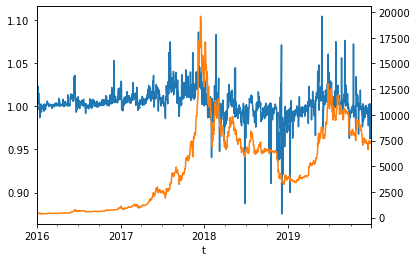

In [74]:
selected_indicators['indicators_sopr'].plot()
px.loc[selected_indicators['indicators_cvdd'].index,'c'].plot(secondary_y = True)

In [76]:
selected_indicators[['indicators_sopr','y']].corr()


,indicators_sopr,y
indicators_sopr,1.000000,0.257213
y,0.257213,1.000000


In [77]:
self.indicators_coef.loc['indicators_sopr']

-208.00610425675873